# L'Analyse Factorielle des Correspondances 

In [2]:
# run pour installer
# %pip install pandas
# %pip install fanalysis
# %pip install numpy
# %pip install matplotlib

In [3]:
import pandas as pd
from fanalysis.ca import CA

In [2]:
df = pd.read_csv('../data/contingency_table--faculty_specialty-v3.csv')
df

,Faculty,Biology and Agriculture,Chemistry and Materials Science,Computer Science and Technology,Economics,Energy and Environment,Geology and Earth Sciences,Mathematics and Applied Mathematics,Mechanical Engineering and Fluids,Medicine and Health Sciences,Physics
0,ENSA,1,0,0,0,0,0,0,0,0,0
1,FLESS,0,0,0,1,0,0,0,0,0,0
2,FMPM,0,0,0,0,1,0,0,0,3,0
3,FSSM,1,0,3,0,1,1,2,1,1,5
4,FSTG,2,0,6,0,0,0,0,0,0,0
5,NaN,0,0,0,0,0,1,0,0,0,0
6,Other,3,7,6,0,2,3,5,0,3,3


In [5]:
df=df.set_index("Faculty")
df

,Biology and Agriculture,Chemistry and Materials Science,Computer Science and Engineering,Geoscience,Mathematics and Modeling,Physics
Faculty,,,,,,
ENSA,1,0,1,3,0,1
FSSM,1,0,0,0,0,0
FSTG,1,0,0,3,0,0
Other,4,6,7,2,1,2


In [6]:
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes
print("Rows", df.index.values)
print("----------------")
print("columns", df.columns.values)
afc=CA(row_labels=df.index.values,col_labels=df.columns.values,stats=True)

Rows ['ENSA' 'FSSM' 'FSTG' 'Other']
----------------
columns ['Biology and Agriculture' 'Chemistry and Materials Science'
 'Computer Science and Engineering' 'Geoscience'
 'Mathematics and Modeling' 'Physics']


In [7]:
afc.fit(df.values)

CA(col_labels=array(['Biology and Agriculture', 'Chemistry and Materials Science',
       'Computer Science and Engineering', 'Geoscience',
       'Mathematics and Modeling', 'Physics'], dtype=object),
   row_labels=array(['ENSA', 'FSSM', 'FSTG', 'Other'], dtype=object))

# Aides à l'interprétation

### Choix des axes factorielles

In [8]:
# Identification des valeurs propres
afc.eig_

array([[3.84256004e-01, 1.18729039e-01, 2.83551453e-02],
       [7.23182647e+01, 2.23452021e+01, 5.33653315e+00],
       [7.23182647e+01, 9.46634668e+01, 1.00000000e+02]])

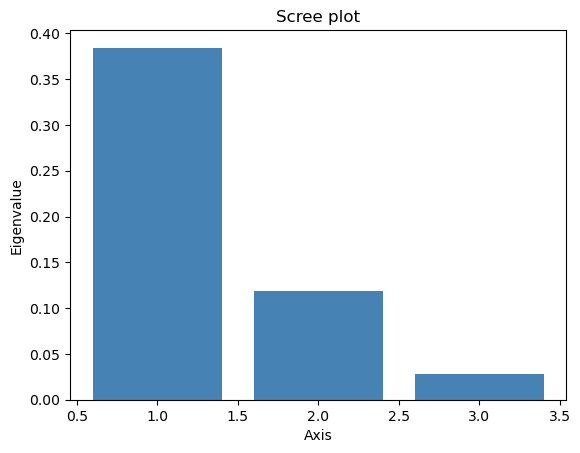

In [9]:
# Graphique des valeurs propres
afc.plot_eigenvalues()

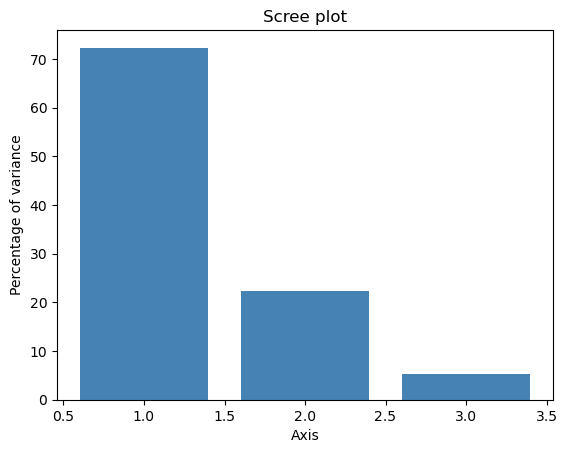

In [10]:
afc.plot_eigenvalues(type="percentage")

- le graphique affiche les pourcentages d'importance cumulée associés à chaque axe. Les pourcentages indiqués sont les suivants :

- Le premier axe : 72%
- Le deuxième axe : 22%
- Le troisième axe : 5%
- Ces pourcentages représentent la proportion de variance expliquée par chaque axe dans l'analyse des correspondances multiples. Le premier axe explique 72% de la variance totale, le deuxième axe explique 22% et le troisième axe explique 5%.
- On retient généralement les premiers axes factoriels qui expliquent la grande majorité de la variance dans les données. Dans ce cas, on doit choisir les axes 1 et 2.

### Analyse des qualités de représentation (cos 2)

L'analyse des qualités de représentation, également connue sous le nom de "cos 2" dans le cadre de l'analyse des correspondances factorielles, est une mesure qui évalue à quel point les variables d'origine sont bien représentées sur les axes de l'analyse. Elle fournit une indication de la proximité entre les variables et les axes de l'analyse.

#### Analyse suivant le profil ligne (les facultés)

Premier axe factoriel


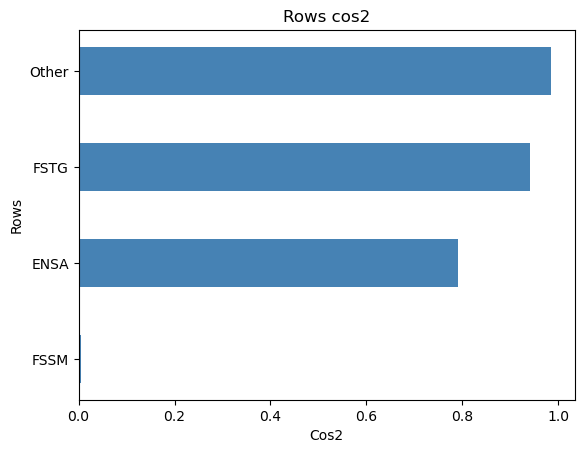

In [11]:
print("Premier axe factoriel")
afc.plot_row_cos2(num_axis=1)

- "other" a une valeur de cos2 de 1, ce qui indique une correspondance parfaite entre cette ligne et le premier axe factoriel. Cela signifie que cette ligne est très bien représentée sur cet axe et qu'elle contribue fortement à sa structure.
- "fstg" a une valeur de cos2 de 0.94, ce qui suggère également une bonne représentation sur le premier axe factoriel, mais légèrement moins forte que la ligne "other".
- "ensa" a une valeur de cos2 de 0.78, ce qui indique une représentation un peu moins forte sur le premier axe factoriel par rapport aux deux lignes précédentes.
- "fssm" a une valeur de cos2 de 0, ce qui signifie qu'il n'a pas de correspondance avec le premier axe factoriel ou qu'il est très faiblement représenté.
 



Second axe factoriel


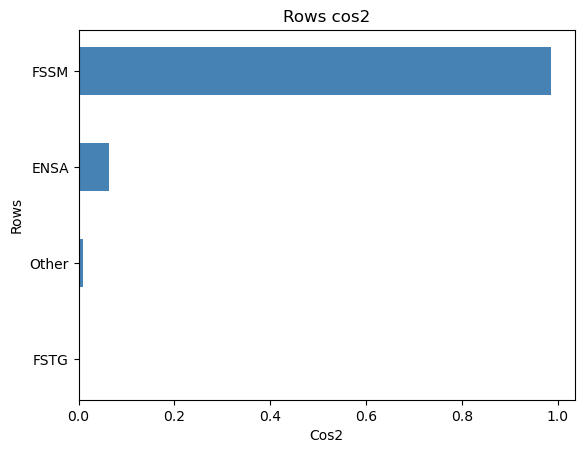

In [13]:
print("Second axe factoriel")
afc.plot_row_cos2(num_axis=2)

- "other" a une valeur de cos2 de 0.01, ce qui indique une faible correspondance avec le deuxième axe factoriel. Cela suggère que cette ligne n'est pas bien représentée sur cet axe et qu'elle a une influence limitée sur sa structure.
- "fstg" a une valeur de cos2 de 0, ce qui signifie qu'il n'a pas de correspondance avec le deuxième axe factoriel ou qu'il est très faiblement représenté.
- "ensa" a une valeur de cos2 de 0.09, ce qui suggère une représentation légèrement plus forte sur le deuxième axe factoriel par rapport à la ligne "other", mais reste relativement faible
- "fssm" a une valeur de cos2 de 0.99, ce qui indique une correspondance très forte avec le deuxième axe factoriel. Cette ligne est donc très bien représentée sur cet axe et contribue fortement à sa structure.

#### Analyse suivant Profil colonne (les spécialités)

Premier axe factoriel


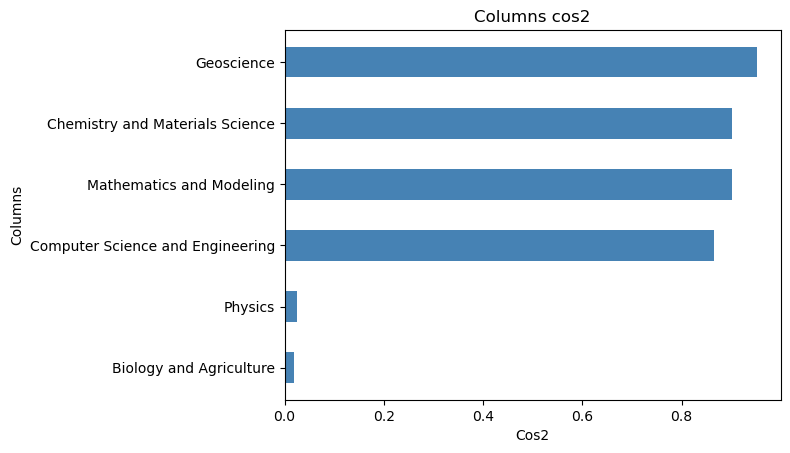

In [14]:
print("Premier axe factoriel")
afc.plot_col_cos2(num_axis=1)

Après avoir examiné le graphique, on peut dire que l'axe 1 représente bien les modalités des columns telles que Geoscience et Computer Science and Engineering et Chemistry and Materials Science et Mathematics and Modeling, car elles ont des valeurs de cos2 élevées.

Second axe factoriel


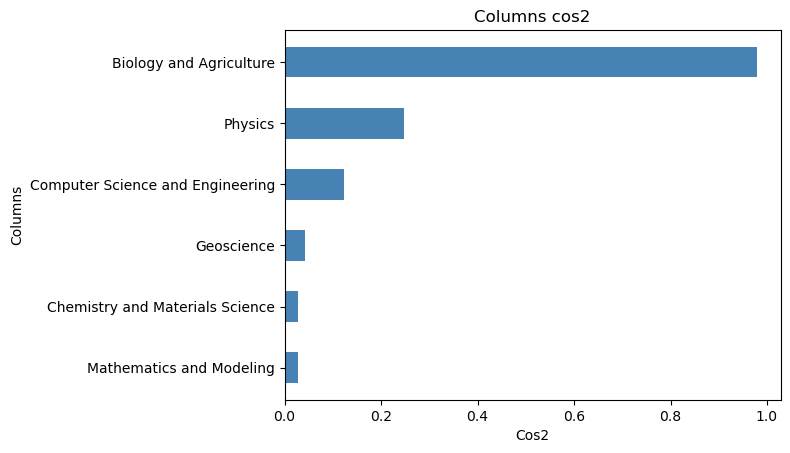

In [15]:
print("Second axe factoriel")
afc.plot_col_cos2(num_axis=2)

Après avoir examiné le graphique, on peut dire que l'axe 2 représente bien la modalité Biology and Agriculture et Physics car elles ont des valeurs de cos2 élevée.

### Analyses des contributions

#### Profil lignes (Faculty)

Premier axe


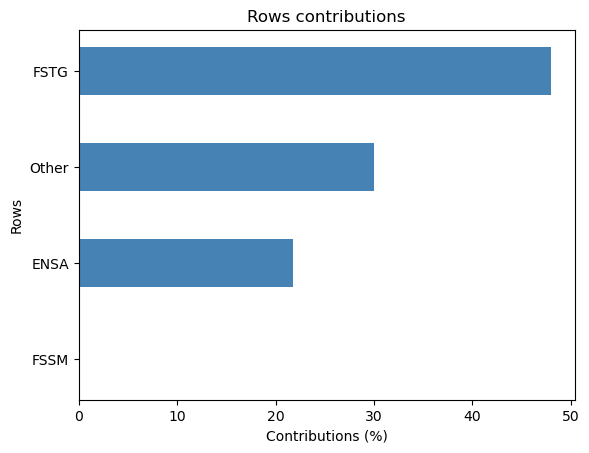

Second axe


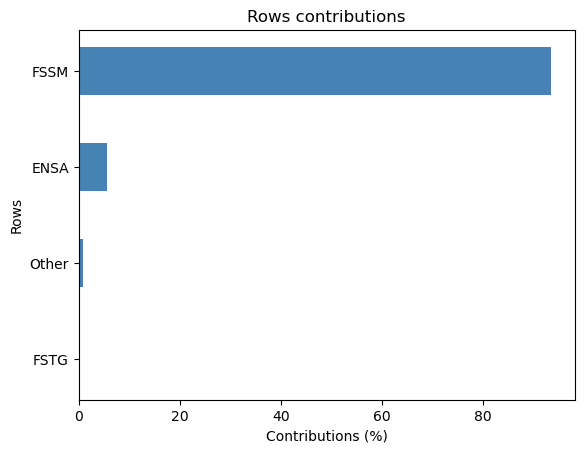

In [17]:
print("Premier axe")
afc.plot_row_contrib(num_axis=1)
print("Second axe")
afc.plot_row_contrib(num_axis=2)

- Premier axe :
  - Les facultés avec des contributions élevées sur le premier axe ont une influence significative sur la variance observée dans cette direction.
  - Les facultés avec des contributions positives élevées peuvent être associées positivement à cet axe, tandis que celles avec des contributions négatives élevées peuvent être associées négativement.
  - dans notre cas les facultés avec des contributions élevées, ils sont: FSTG, Other, ENSA
- Second axe :
  - Les mêmes principes s'appliquent au deuxième axe, mais il capture une part différente de la variance non expliquée par le premier axe.
  - L'analyse des contributions sur le deuxième axe peut révéler des associations ou des patterns qui ne sont pas capturés par le premier axe.
  - dans notre cas les facultés avec des contributions élevées, ils sont: FSSM

#### Profil colonne (spécialités)

Premier axe


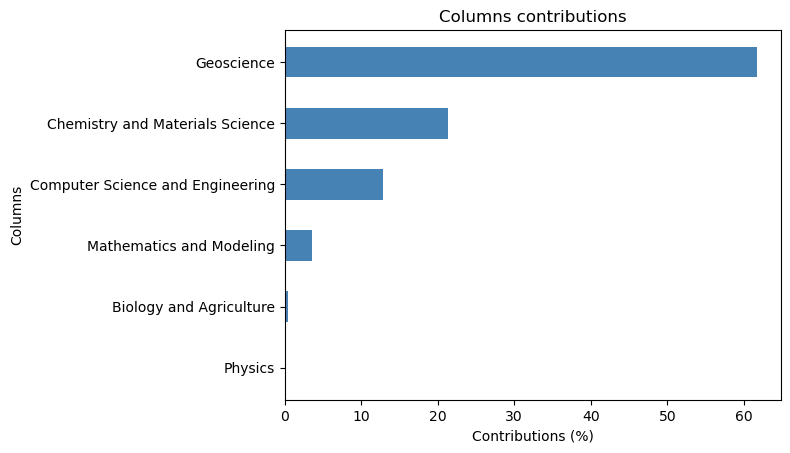

Second axe


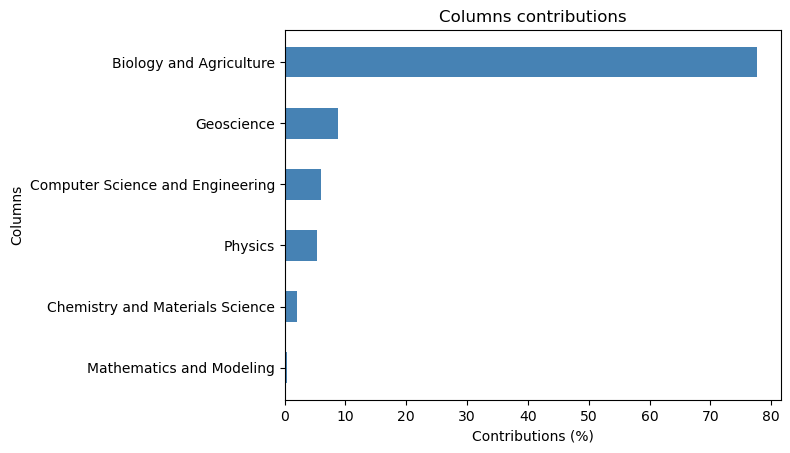

In [18]:
print("Premier axe")
afc.plot_col_contrib(num_axis=1)
print("Second axe")
afc.plot_col_contrib(num_axis=2)

- Premier axe :
  - Les variables (dans notre cas, la modalite `Geoscience`) avec des contributions élevées sur le premier axe ont une influence significative sur la variance observée dans cette direction.
- Second axe :
  - Le deuxième axe capture une part différente de la variance non expliquée par le premier axe.
  - Les variables avec des contributions élevées sur le deuxième axe (dans notre cas, la modalite `Biology and Agriculture`) peuvent révéler des associations ou des tendances qui ne sont pas expliquées par le premier axe.

# Analyse Graphique

#### Graphique des facultés (profil ligne)

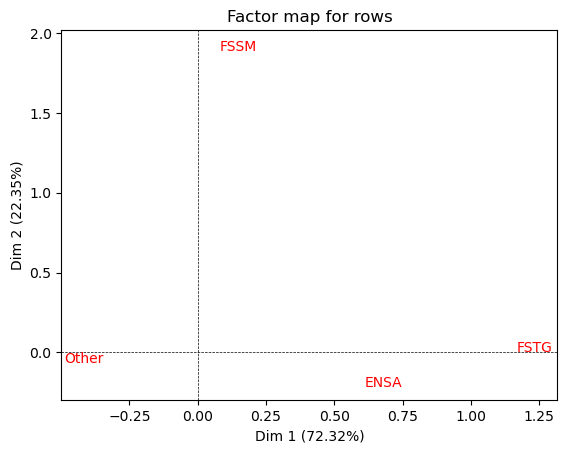

In [19]:
afc.mapping_row(num_x_axis=1,num_y_axis=2)

Après avoir examiné ce graphique, on peut conclure que :
-  `other` et `fstg` et `fssm` sont plus éloignés, donc on peut dire que ces modalités sont moins similaires.
- `ensa`, `fstg` sont similaires car ils sont plus proches les uns des autres.

#### Graphique des spécialités (profil colonne)

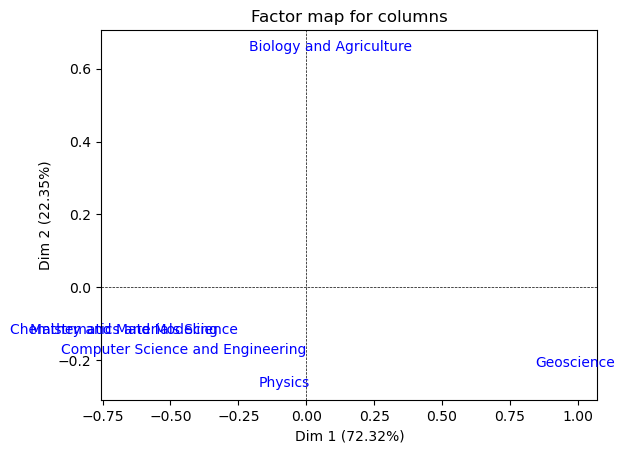

In [20]:
afc.mapping_col(num_x_axis=1,num_y_axis=2)

Après avoir examiné ce graphique, on peut conclure que :
- `Chemistry and Materials Science`, `Computer Science and Engineering`, `Mathematics and Modeling` sont similaires car ils sont plus proches les uns des autres.
- En revanche, `Biology and Agriculture` et `Geoscience` et `Physics` sont plus éloignés, donc on peut dire que ces modalités sont moins similaires.

#### Graphique superposition des profils lignes et colonnes

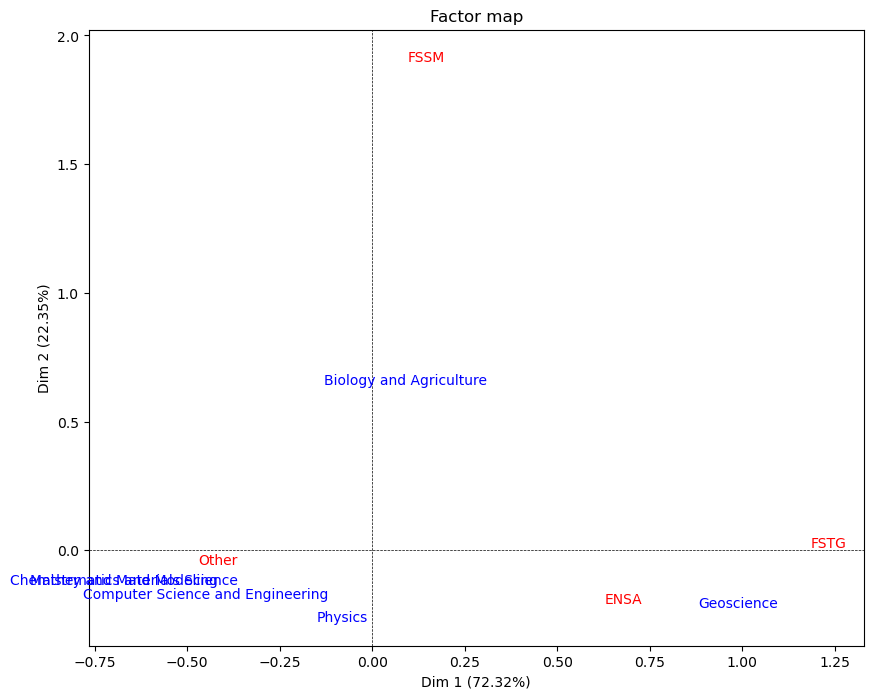

In [21]:
afc.mapping(1, 2, figsize=(10, 8))

- La spécialité `Geoscience` se trouvent dans le quadrant inférieur droit. On peut donc conclure que La spécialité `Geoscience` est liée au facultés `ensa` et `fstg`, mais elles ne sont pas très proches. Ainsi, la liaison entre elles n'est pas très forte

- Les spécialités `Chemistry and Materials Science`, `Computer Science and Engineering`, `Mathematics and Modeling` sont celles pour lesquelles les autres facultés `other` est plus proche ou plus similaire. Cela suggère que ces spécialités sont fréquemment effectuées par les autres facultés.


- La spécialité `Biology and Agriculture` est positionnées dans le quadrant supérieur, On peut donc conclure que La spécialité `Biology and Agriculture` est liée a la faculté `fssm`, mais elles ne sont pas très proches. Ainsi, la liaison entre elles n'est pas très forte

